# Up/Down Volume Ratio (UDVR)

https://www.linnsoft.com/techind/updown-volume-ratio-udvr  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2019-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-05:00,38.722500,39.712502,38.557499,39.480000,38.047050,148158800
2019-01-03 00:00:00-05:00,35.994999,36.430000,35.500000,35.547501,34.257290,365248800
2019-01-04 00:00:00-05:00,36.132500,37.137501,35.950001,37.064999,35.719700,234428400
2019-01-07 00:00:00-05:00,37.174999,37.207500,36.474998,36.982498,35.640194,219111200
2019-01-08 00:00:00-05:00,37.389999,37.955002,37.130001,37.687500,36.319603,164101200


In [3]:
df.index = pd.Index(df.index.date, name="Date")

In [4]:
n = 10  # number of periods
df['UDVR'] = 0.0


for i in range(n, len(df)):
    up_vol = df.iloc[i-n:i]['Volume'][df.iloc[i-n:i]['Close'] < df.iloc[i]['Close']].sum()
    down_vol = df.iloc[i-n:i]['Volume'][df.iloc[i-n:i]['Close'] > df.iloc[i]['Close']].sum()
    if down_vol == 0:
        df.at[df.index[i], 'UDVR'] = up_vol
    else:
        df.at[df.index[i], 'UDVR'] = up_vol / down_vol


In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,UDVR
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047050,148158800,0.0
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257290,365248800,0.0
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719700,234428400,0.0
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640194,219111200,0.0
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319603,164101200,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,UDVR
Date,,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517082,48478800,1.271367e+09
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896324,93121200,1.229426e+09
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000,1.235668e+01
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290047,144114400,1.252746e+09
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810936,100805600,1.263272e+09


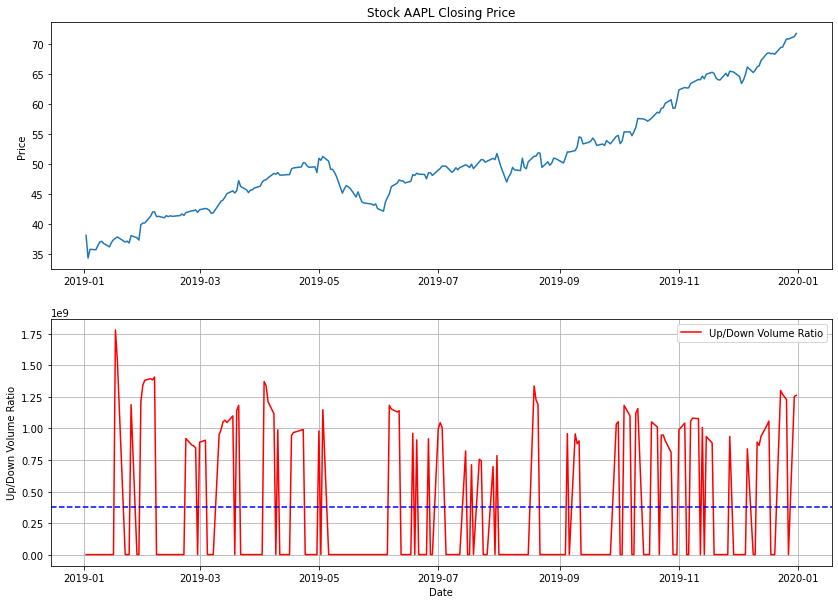

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['UDVR'], label='Up/Down Volume Ratio', color='red')
ax2.axhline(y=df['UDVR'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Up/Down Volume Ratio')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Up/Down Volume Ratio (UDVR)

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,UDVR,VolumePositive
0,737061.0,38.722500,39.712502,38.557499,39.480000,38.047050,148158800,0.0,False
1,737062.0,35.994999,36.430000,35.500000,35.547501,34.257290,365248800,0.0,False
2,737063.0,36.132500,37.137501,35.950001,37.064999,35.719700,234428400,0.0,False
3,737066.0,37.174999,37.207500,36.474998,36.982498,35.640194,219111200,0.0,False
4,737067.0,37.389999,37.955002,37.130001,37.687500,36.319603,164101200,0.0,False


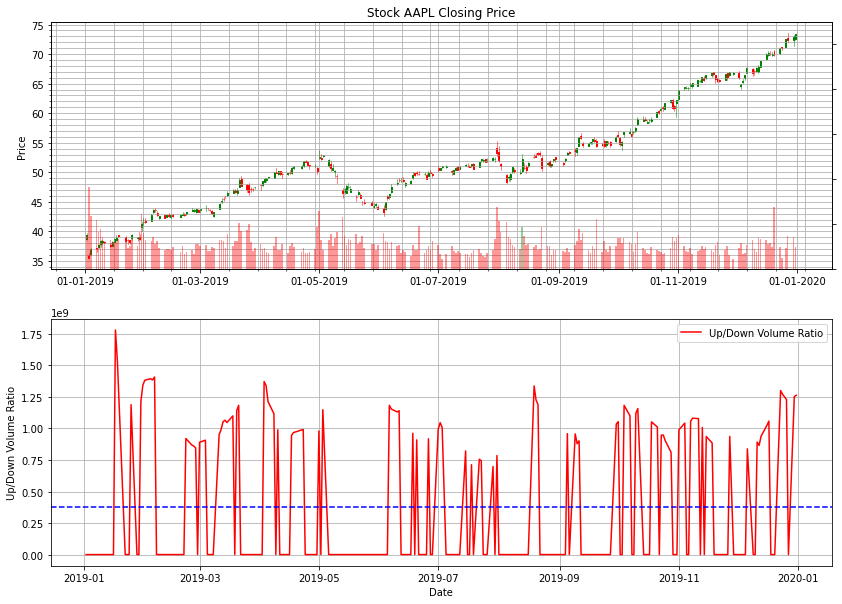

In [9]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['UDVR'], label='Up/Down Volume Ratio', color='red')
ax2.axhline(y=df['UDVR'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Up/Down Volume Ratio')
ax2.set_xlabel('Date')
ax2.legend(loc='best')